In [1]:
!python -m pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet  # Note the import change

Index(['date', 'sess_id', 'seqnum', 'tradedate', 'tradetime', 'ticker',
       'clgroup', 'pos', 'pos_long', 'pos_short', 'pos_long_num',
       'pos_short_num', 'systime'],
      dtype='object')
                 date  sess_id  seqnum   tradedate tradetime ticker clgroup  \
0 2020-05-08 10:02:14     6035      66  2020-05-08  10:02:14     Si     FIZ   
1 2020-05-08 10:06:45     6035      67  2020-05-08  10:06:45     Si     FIZ   
2 2020-05-08 10:13:20     6035      68  2020-05-08  10:13:20     Si     FIZ   
3 2020-05-08 10:17:45     6035      69  2020-05-08  10:17:45     Si     FIZ   
4 2020-05-08 10:22:00     6035      70  2020-05-08  10:22:00     Si     FIZ   

      pos  pos_long  pos_short  pos_long_num  pos_short_num  \
0  232410    406652    -174242          8005           4099   
1  239213    407318    -168105          8016           4238   
2  241593    406756    -165163          7994           4298   
3  241692    406160    -164468          8004           4315   
4  242962    4

02:18:32 - cmdstanpy - INFO - Chain [1] start processing
02:25:46 - cmdstanpy - INFO - Chain [1] done processing
c:\users\rromm\pycharmprojects\1hu\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\users\rromm\pycharmprojects\1hu\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


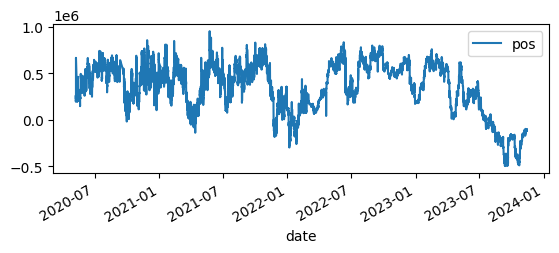

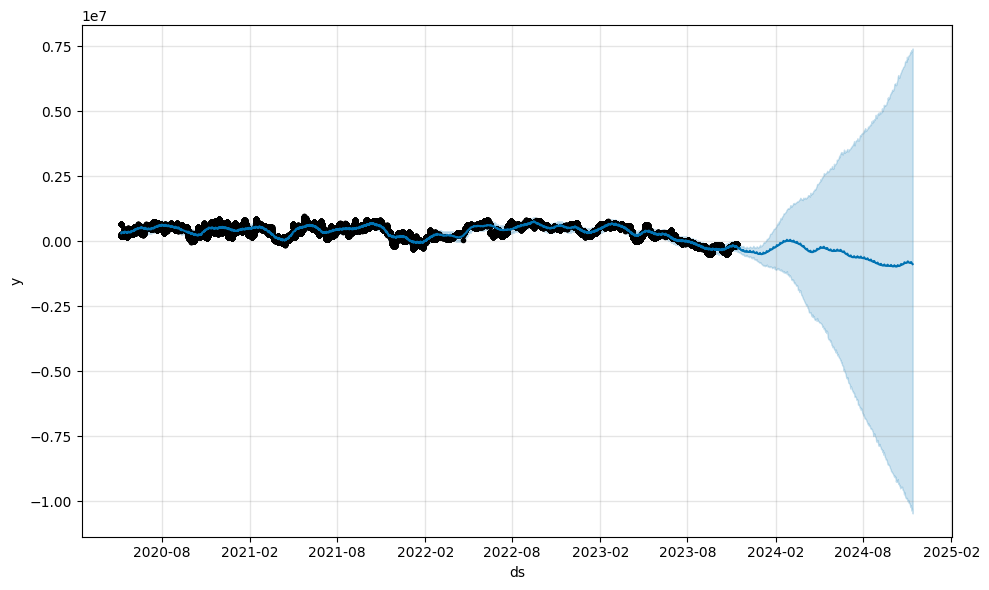

In [2]:
# Assuming 'date' is in lowercase, modify if it's in a different case
df = pd.read_csv("si_full_date.csv")
df['date'] = pd.to_datetime(df['tradedate'].astype(str) + ' ' + df['tradetime'].astype(str))
df.set_index('date', inplace=True)

# Now net_df has the combined datetime as the index
df.head(3)

# Now df has unique columns
df = df.loc[df['clgroup'] == 'FIZ']
df[["pos"]].plot(subplots=True, layout=(2, 1));

# Creating an instance of the model
model = Prophet()

# Resetting the index to access 'date' as a column
df = df.reset_index()

# Preparing data (DataFrame df should have columns 'ds' for dates and 'y' for time series values)
df_for_model = pd.DataFrame()
df_for_model["ds"] = df["date"]  # Now 'date' is accessible as a column
df_for_model["y"] = df['pos']  # Make sure 'pos' is a valid column name

# Check DataFrame columns
print(df.columns)

# Check a few rows of the DataFrame
print(df.head())

# Preparing data (DataFrame df should have columns 'ds' for dates and 'y' for time series values)
model.fit(df_for_model)

# Creating a DataFrame for future dates
future = model.make_future_dataframe(periods=365)

# Getting the forecast
forecast = model.predict(future)

# Visualizing the results
fig = model.plot(forecast)


In [14]:
print(forecast.head(3))

df = forecast[['ds', 'yhat']]

print(df)

df = df[str(df["ds"]) > "2020-11-13"]

print(df)

                   ds          trend     yhat_lower     yhat_upper  \
0 2020-05-08 10:02:14  101642.878288  157859.954016  443902.107957   
1 2020-05-08 10:06:45  101663.790810  159135.538017  441983.667933   
2 2020-05-08 10:13:20  101694.272162  166024.317528  456348.537157   

     trend_lower    trend_upper  additive_terms  additive_terms_lower  \
0  101642.878288  101642.878288   202801.939684         202801.939684   
1  101663.790810  101663.790810   202980.214518         202980.214518   
2  101694.272162  101694.272162   203213.523800         203213.523800   

   additive_terms_upper        daily  ...        weekly  weekly_lower  \
0         202801.939684 -9823.372586  ... -11688.158764 -11688.158764   
1         202980.214518 -9757.519570  ... -11584.211762 -11584.211762   
2         203213.523800 -9689.443534  ... -11431.304250 -11431.304250   

   weekly_upper         yearly   yearly_lower   yearly_upper  \
0 -11688.158764  224313.471034  224313.471034  224313.471034   
1 -11

KeyError: False